In [1]:
import pandas as pd 
import numpy as np


#load data

#please change the name of the data file and run all the cells 

data = pd.read_csv('./D9x.csv',  index_col=None)




def indexify(x):

    seq = sorted(x, reverse = True)
    index = [seq.index(v)+1 for v in x]
    return index


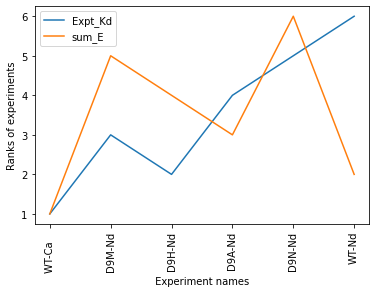

In [2]:
import matplotlib.pyplot as plt 

y1 = indexify(data['Expt_Kd'])
y2 = indexify(data['sum_E'])

x = [i+1 for i in range(len(y1))]


plt.plot(x,y1)
plt.plot(x,y2)
plt.ylabel('Ranks of experiments')
plt.xlabel(' Experiment names ')
plt.xticks(x,list(data['System']),rotation = 90)
plt.legend(['Expt_Kd','sum_E'])

In [3]:
kd_rank = indexify(list(data['Expt_Kd']))
print(kd_rank)

[1, 3, 2, 4, 5, 6]


In [4]:
weights = np.array([1,1,1,1])
data_4 = np.array(data[["Elec-SR","VdW-SR","Elec-LR","VdW-LR"]])
data_4

array([[-1950.9,   -25.9,   732.3,    15.6],
       [-3807.2,    42.4,   721.5,    37.2],
       [-3842.6,    43.4,   754.4,    39.7],
       [-3798.1,    44.4,   723.2,    37.2],
       [-3839.3,    44.8,   655.2,    38.4],
       [-3339.8,    38.9,   730.1,    36.7]])

In [5]:
list_ = indexify(data['sum_E'])

print(list_)

[1, 5, 4, 3, 6, 2]


In [6]:
def sum_calc_easy(weights, kd_rank, data_4):
    list_ = []
    for i in range(data_4.shape[0]):
        list_.append(np.sum(data_4[i]*weights))

    list_ = indexify(np.array(list_))



    return np.corrcoef(np.array(list_),np.array(kd_rank))[1][0]

In [7]:
frac = np.linspace(0,1,11)
mult = np.linspace(2,10,9)
frac_mult = np.concatenate((frac,mult), axis = 0)
frac_mult

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. ])

In [8]:
dict_ = {}
counter = 0
for i in frac_mult:
    for j in frac_mult:
        for k in frac_mult:
            for l in frac_mult:
                inside_dict = {}
                inside_dict['w1'] = i
                inside_dict['w2'] = j
                inside_dict['w3'] = k
                inside_dict['w4'] = l 
                
                sum_ = sum_calc_easy(np.array([i,j,k,l]), kd_rank, data_4)
                inside_dict['sum'] = sum_
                dict_[counter] = inside_dict
                counter+=1
                if counter % 100000 == 0:
                    print('done: ', counter)


c:\Users\15156\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\15156\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


done:  100000


In [9]:
# import pickle

# with open('weights_n_pearson.pkl', 'wb') as fp:
#     pickle.dump(dict_, fp)
#     print('dictionary saved successfully to file')

In [10]:
main_data = pd.DataFrame(dict_).transpose().sort_values(by = 'sum')
main_data

,w1,w2,w3,w4,sum
31206,0.3,9.0,0.0,0.6,-0.942857
14412,0.1,7.0,0.0,3.0,-0.942857
14411,0.1,7.0,0.0,2.0,-0.942857
13611,0.1,5.0,0.0,2.0,-0.942857
13612,0.1,5.0,0.0,3.0,-0.942857
...,...,...,...,...,...
28725,0.3,2.0,7.0,0.5,0.600000
28726,0.3,2.0,7.0,0.6,0.600000
28719,0.3,2.0,6.0,10.0,0.600000
24780,0.3,0.1,10.0,0.0,0.600000


In [11]:
main_data = main_data[main_data['sum'] >= sum_calc_easy([1,1,1,1], kd_rank, data_4)]
main_data

,w1,w2,w3,w4,sum
99471,3.0,0.8,4.0,2.0,0.257143
99470,3.0,0.8,4.0,1.0,0.257143
117499,5.0,4.0,5.0,10.0,0.257143
13163,0.1,3.0,9.0,0.3,0.257143
117497,5.0,4.0,5.0,8.0,0.257143
...,...,...,...,...,...
28724,0.3,2.0,7.0,0.4,0.600000
28725,0.3,2.0,7.0,0.5,0.600000
28726,0.3,2.0,7.0,0.6,0.600000
28719,0.3,2.0,6.0,10.0,0.600000


In [12]:
weights = main_data[main_data['sum']==max(list(main_data['sum']))]
weights = np.array(weights)[-1][:-1]
weights

array([ 0.3,  0.1, 10. ,  0. ])

In [13]:
max(list(main_data['sum']))

0.6

In [14]:
system = {}
energies = {}
kd = {}



for i in np.array(data):

    a = {}
    energies = i[1:-2]
    a['energy'] = energies
    a['kd'] = i[-1]
    a['sum'] = sum(energies)
    weighted_energy = np.multiply(np.array(energies),np.array(weights))
    a['weighted_energy'] = weighted_energy
    sum_weighted_energy = np.sum(np.multiply(np.array(energies),np.array(weights)))
    a['weighted_sum'] = sum_weighted_energy
    a['frac_contribution'] = weighted_energy/sum_weighted_energy

    system[i[0]] = a


In [15]:
kd_list = indexify(data['Expt_Kd'])
sum_E = indexify([system[i]['sum'] for i in system.keys()])
sum_wE = indexify([system[i]['weighted_sum'] for i in system.keys()])
indx = list(system.keys())

rank_weighted = {}
rank_weighted['index'] = indx
rank_weighted['kd_list'] = kd_list 
rank_weighted['sum_E'] = sum_E
rank_weighted['sum_wE'] = sum_wE



rank_weighted = pd.DataFrame(rank_weighted).sort_values(by = 'kd_list')

In [16]:
rank_weighted

,index,kd_list,sum_E,sum_wE
0,WT-Ca,1,1,1
2,D9H-Nd,2,4,2
1,D9M-Nd,3,5,5
3,D9A-Nd,4,3,4
4,D9N-Nd,5,6,6
5,WT-Nd,6,2,3


In [17]:
print(kd_rank)

print(sum_wE)
print(np.corrcoef(kd_list,sum_wE)[1][0])

print('----------------------')


print(kd_list)
print(sum_E)
print(np.corrcoef(kd_list,sum_E)[1][0])

[1, 3, 2, 4, 5, 6]
[1, 5, 2, 4, 6, 3]
0.6
----------------------
[1, 3, 2, 4, 5, 6]
[1, 5, 4, 3, 6, 2]
0.2571428571428572


Text(0.5, 0, '\nexperiments\n')

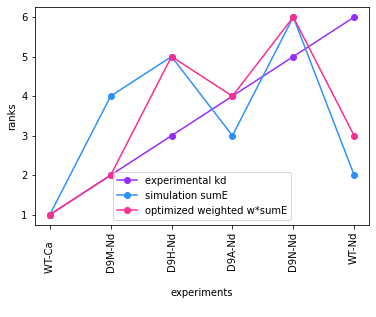

In [18]:
import matplotlib.pyplot as plt

x = [i+1 for i in range(len(rank_weighted['kd_list']))]

plt.plot(x,rank_weighted['kd_list'], color = '#962ef9', marker = 'o')
plt.plot(x,rank_weighted['sum_E'],color = '#2e91f9', marker = 'o')
plt.plot(x,rank_weighted['sum_wE'],color = '#f92e91', marker = 'o')
plt.xticks(x,list(system.keys()),rotation = 90)
# plt.plot(x1,y1,color = '#91f92e', marker = 'o')
# plt.plot(x2,y2,color='#962ef9', marker = 's')
# plt.plot(x3,y3,color ='#2e91f9', marker = '>')
# plt.plot(x4,y4, color = '#f92e91',marker = '*')
plt.ylabel('ranks')
plt.legend(['experimental kd','simulation sumE', 'optimized weighted w*sumE'])
plt.xlabel('\nexperiments\n')


In [19]:
def log_finder(array):
    import math
    out = []
    for i in array:
        if i == 0:
            out.append(0)
        else:
            out.append(math.log10(i))

    out[0] = 0

    return out

Text(0, 0.5, 'log (10 base) weights (w)')

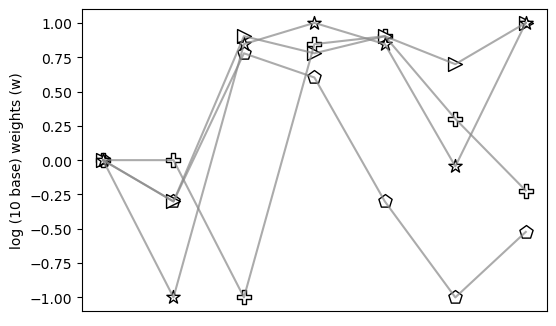

In [21]:
import seaborn as sns
import math

sorted_dataframe = main_data[(main_data != 0).all(1)].drop_duplicates('sum',keep='first')

plt.figure(dpi=100)

y1 = log_finder(sorted_dataframe['w1'])
y2 = log_finder(sorted_dataframe['w2'])
y3 = log_finder(sorted_dataframe['w3'])
y4 = log_finder(sorted_dataframe['w4'])


x1 = np.arange(len(y1))
x2 = np.arange(len(y2))
x3 = np.arange(len(y3))
x4 = np.arange(len(y4))


# plt.ylim([-2,11])
# plt.xlim([0,145])


# plt.scatter(x1,y1,color = '#91f92e', marker = 'o')
# plt.scatter(x2,y2,color='#962ef9', marker = 's')
# plt.scatter(x3,y3,color ='#2e91f9', marker = '>')
# plt.scatter(x4,y4, color = '#f92e91',marker = '*')
plt.plot(x1,y1,color = '#888888', alpha = .7)
plt.plot(x2,y2,color = '#888888', alpha = .7)
plt.plot(x3,y3,color = '#888888', alpha = .7)
plt.plot(x4,y4,color = '#888888', alpha = .7)
plt.scatter(x1,y1, marker = 'p', s = 100, facecolors = 'w', edgecolors='k', lw = 1)
plt.scatter(x2,y2, marker = 'P', s = 100, facecolors = 'w', edgecolors='k', lw = 1)
plt.scatter(x3,y3, marker = '>', s = 100, facecolors = 'w', edgecolors='k', lw = 1)
plt.scatter(x4,y4, marker = '*', s = 100, facecolors = 'w', edgecolors='k', lw = 1)


plt.xticks([])

plt.ylabel('log (10 base) weights (w)')
# plt.legend(['w1','w2','w3','w4'])

print(' figure 6 plotted ...')